# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [111]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [112]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [113]:
url = 'https://companiesmarketcap.com/tesla/revenue/'

# Realizar una petición GET al sitio web
response = requests.get(url)

# comprobar si hemos tenida éxito en la petición
if response.status_code==200:
  # Leemos el html con BeautifulSoup y almanecemos el texto en una variable :
  soup = BeautifulSoup(response.content, 'html.parser')

print(soup)


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ico

In [114]:
#Buscamos todas las tablas :
tables = soup.find_all('table')
print(tables)


[<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="2 Oct 2023 - 30 Sep 2024"/></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2023 - 31 Dec 2023"/></td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2022 - 31 Dec 2022"/></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span

In [115]:
#Encontramos la tabla con la evolución anual.
anual_table = soup.find('table', class_ ='table') #lo ví linea 309 en el código
print(anual_table)




<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="2 Oct 2023 - 30 Sep 2024"/></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2023 - 31 Dec 2023"/></td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jan 2022 - 31 Dec 2022"/></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span>

In [116]:

# Almacena los datos en un DataFrame
data = []


#Bucle para iterar sobre las filas 
#En html, una fila es <tr>, y añado [1:] para saltar la primera fila sino me salía una fila vacía

for row in anual_table.find_all('tr')[1:]:

    year = row.find('span', class_='year').get_text().strip() if row.find('span', class_='year') else ''
    revenue = row.find_all('td')[1].get_text().strip().replace('$', '') if len(row.find_all('td')) > 1 else '' #Como pedido en paso 4, quito $
    change = row.find_all('td')[2].get_text().strip() if len(row.find_all('td')) > 2 else '' 
    
    # Agrega los datos a la lista
    data.append((year, revenue, change))

# Crear el DataFrame
df_anual_table = pd.DataFrame(data, columns=['Year', 'Revenue', 'Change'])

df_anual_table





,Year,Revenue,Change
0,2024,97.15 B,0.39%
1,2023,96.77 B,18.8%
2,2022,81.46 B,51.35%
3,2021,53.82 B,70.67%
4,2020,31.53 B,28.31%
5,2019,24.57 B,14.52%
6,2018,21.46 B,82.51%
7,2017,11.75 B,67.98%
8,2016,7.00 B,73.01%
9,2015,4.04 B,26.5%


In [117]:
#Almanecemos con Sqlite : 
import sqlite3
#SQLite usa un archivo de base de datos independiente y sin necesidad de un servidor centralizado. A diferencia MySQL o PostgreSQL

#Crear conexión a la base de datos:
connexion = sqlite3.connect('annual_table')
cursor = connexion.cursor()

#Crear la tabla
cursor.execute("""
CREATE TABLE IF NOT EXISTS annual_revenue (
    Year TEXT,
    Revenue TEXT,
    Change TEXT
)
""")

#Convertir df a tuplas y chequear :
annual_revenue_tuples = list(df_anual_table.to_records(index=False))
print(annual_revenue_tuples[:5])

#Ok, entonces insertar en df :
cursor.executemany("""
INSERT INTO annual_revenue (Year, Revenue, Change)
VALUES (?, ?, ?)
""", annual_revenue_tuples)

connexion.commit()


#print : 
for row in cursor.execute("SELECT * FROM annual_revenue"):
    print(row)

connexion.close()


[np.record(('2024', '97.15 B', '0.39%'), dtype=[('Year', 'O'), ('Revenue', 'O'), ('Change', 'O')]), np.record(('2023', '96.77 B', '18.8%'), dtype=[('Year', 'O'), ('Revenue', 'O'), ('Change', 'O')]), np.record(('2022', '81.46 B', '51.35%'), dtype=[('Year', 'O'), ('Revenue', 'O'), ('Change', 'O')]), np.record(('2021', '53.82 B', '70.67%'), dtype=[('Year', 'O'), ('Revenue', 'O'), ('Change', 'O')]), np.record(('2020', '31.53 B', '28.31%'), dtype=[('Year', 'O'), ('Revenue', 'O'), ('Change', 'O')])]
('2024', '97.15 B', '0,39%')
('2023', '96.77 B', '18,8%')
('2022', '81.46 B', '51,35%')
('2021', '53.82 B', '70,67%')
('2020', '31.53 B', '28,31%')
('2019', '24.57 B', '14,52%')
('2018', '21.46 B', '82,51%')
('2017', '11.75 B', '67,98%')
('2016', '7.00 B', '73,01%')
('2015', '4.04 B', '26,5%')
('2014', '3.19 B', '58,85%')
('2013', '2.01 B', '387,23%')
('2012', '0.41 B', '102,34%')
('2011', '0.20 B', '74,95%')
('2010', '0.11 B', '4,29%')
('2009', '0.11 B', '')
('2024', '97.15 B', '0,39%')
('2023',

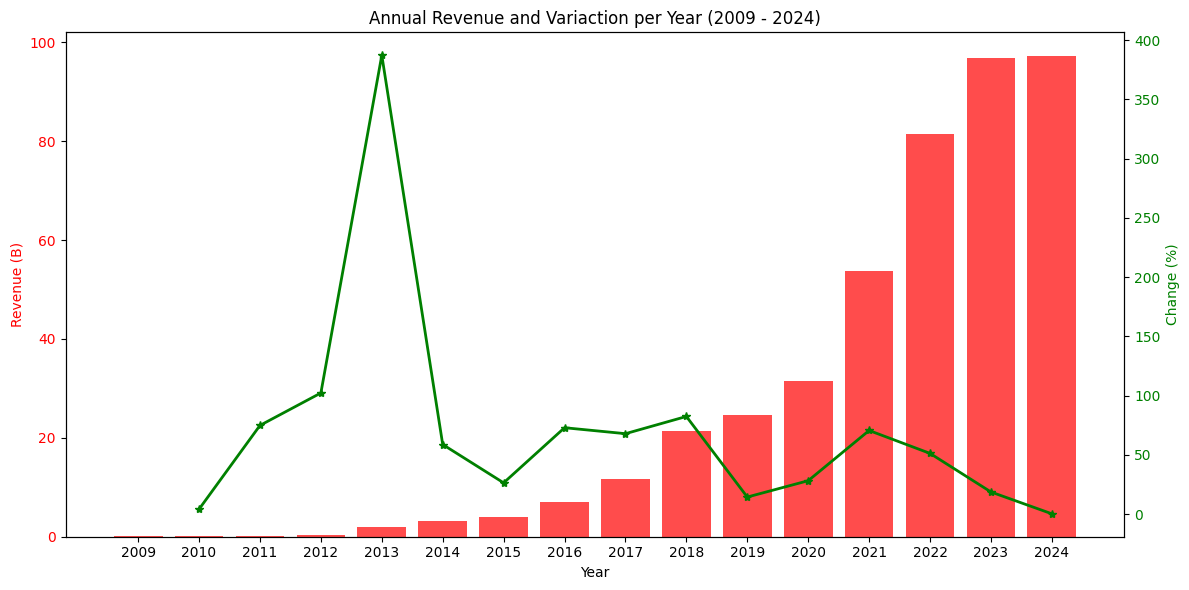

In [118]:
#Vizualisamos : 
#Quiero poner en el mismo graph los revenues x año en barras y linea de la variación 

#Invierto el df para que la vizualisacion sea más logica y que me enseñe del 2009 a 2024 y no el contrario : 
df_invertido = df_anual_table[::-1].reset_index(drop=True)

# Ajustamos formato de la columna "Revenue" y change, sino me salía una linea recta, y datos de % en desorden en el eje y

df_invertido['Revenue'] = df_invertido['Revenue'].str.replace(' B', '')  # Eliminar ' B'
df_invertido['Revenue'] = pd.to_numeric(df_invertido['Revenue'], errors='coerce')  # Convertir a numérico

df_invertido['Change'] = df_invertido['Change'].str.replace('%', '')  # Eliminar el símbolo '%'
df_invertido['Change'] = pd.to_numeric(df_invertido['Change'], errors='coerce')  # Convertir a numérico

# Crear el gráfico combinado con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer gráfico de barras para 'Revenue'
ax1.bar(df_invertido['Year'], df_invertido['Revenue'], color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue (B)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Crear un segundo eje Y para la variación (Change)
ax2 = ax1.twinx()
ax2.plot(df_invertido['Year'], df_invertido['Change'], color='green', marker='*', linestyle='-', linewidth=2, markersize=6)
ax2.set_ylabel('Change (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Annual Revenue and Variaction per Year (2009 - 2024)')

plt.xticks(rotation=45) #ticks() sirve para mejorar visibilidad porque los años de pegaban entre ellas

plt.tight_layout()

plt.show()


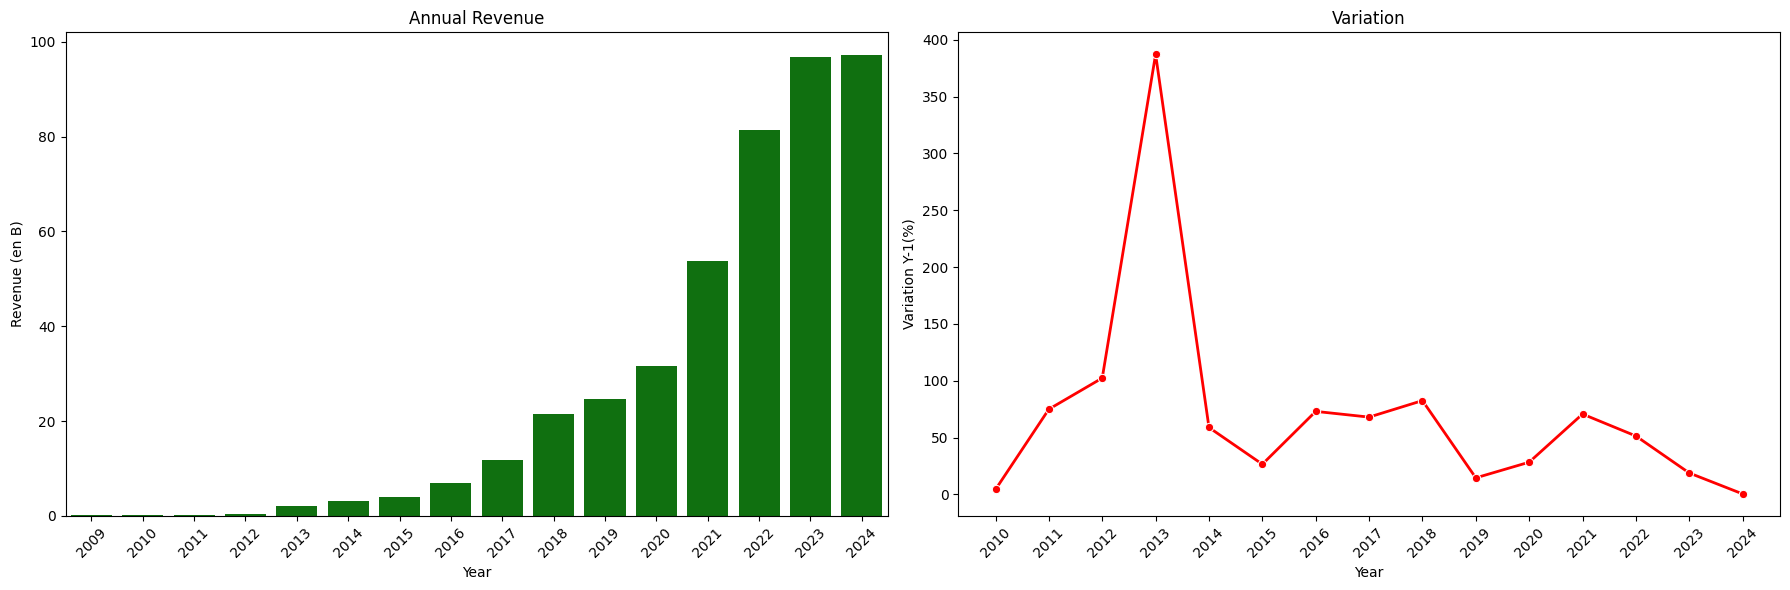

In [125]:
#Hacemos esa misma vizualisación pero con subplot y libreria seaborn : 

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Barras para Revenue
sns.barplot(x='Year', y='Revenue', data=df_invertido, color='green', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Revenue (en B)')
ax[0].set_title('Annual Revenue')
ax[0].tick_params(axis='x', rotation=45) #igual, para mejorar visibilidad

# Linea para change :
sns.lineplot(x='Year', y='Change', data=df_invertido, color='red', marker='o', ax=ax[1], linewidth=2)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Variation Y-1(%)')
ax[1].set_title('Variation')
ax[1].tick_params(axis='x', rotation=45)  


plt.tight_layout()
plt.show()

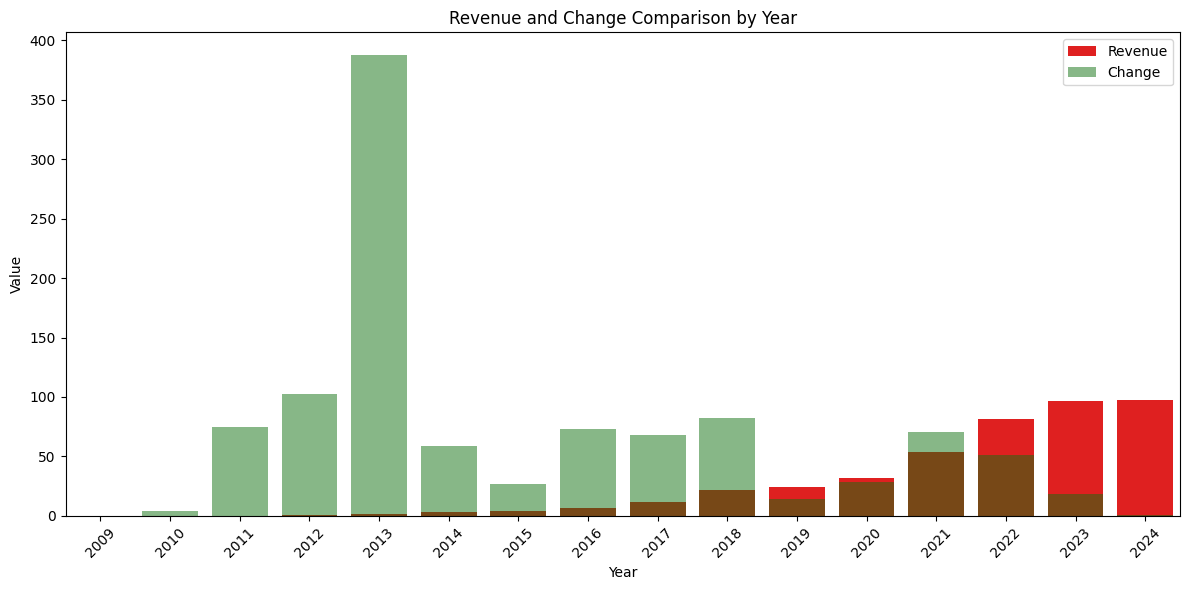

Tendencia general: observamos que en la mayoría de los casos, más aumentan los ingresos, más pequeña es la variación.
 El margen de crecimiento es más pequeño cuando los ingresos son elevedos.


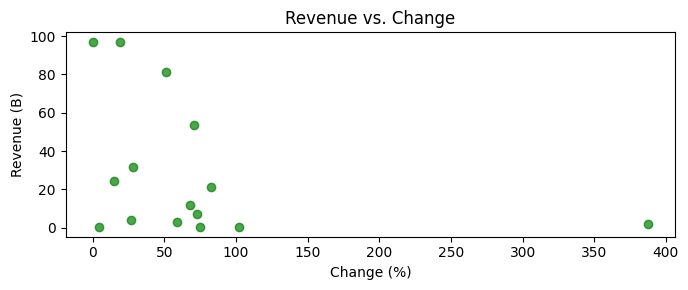

Se confirma también con ese gráfico, en general cuando el porcentaje de variación vs año pasado es elevado (más de 50% por ejemplo), es cuando los ingresos eran de máximo 20B.)


In [131]:
#Podemos estudiar si hay corelación entre el monto del Revenue y el porcentaje de change

#Hacemos barras de Revenue y Change, las unas sobre las otras :
plt.figure(figsize=(12, 6))

sns.barplot(x='Year', y='Revenue', data=df_invertido, color='red', label='Revenue')
sns.barplot(x='Year', y='Change', data=df_invertido, color='green', label='Change', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Revenue and Change Comparison by Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print('Tendencia general: observamos que en la mayoría de los casos, más aumentan los ingresos, más pequeña es la variación.\n El margen de crecimiento es más pequeño cuando los ingresos son elevedos.')

# También se puede estudiar con grafico de dispersion?
plt.figure(figsize=(7, 3))
plt.scatter(df_invertido['Change'], df_invertido['Revenue'], color='green', alpha=0.7)
plt.xlabel('Change (%)')
plt.ylabel('Revenue (B)')
plt.title('Revenue vs. Change')
plt.tight_layout()
plt.show()

print('Se confirma también con ese gráfico, en general cuando el porcentaje de variación vs año pasado es elevado (más de 50% por ejemplo), es cuando los ingresos eran de máximo 20B.)')

